In [1]:
import os
import pandas as pd
data = pd.DataFrame()

In [2]:
train_path = r"Data/train"
test_path = r"Data/test"
valid_path = r"Data/valid"

Random image path: Data\train\adenocarcinoma\ac_26.png
Image class: adenocarcinoma
Image height: 251
Image width: 392


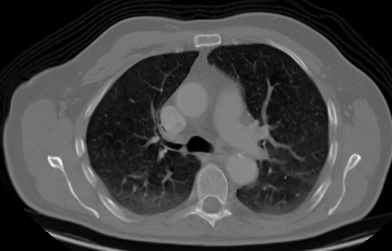

In [3]:

from pathlib import Path
import random
from PIL import Image

image_path = Path(train_path)

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*.png"))
# print(image_path_list)
# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

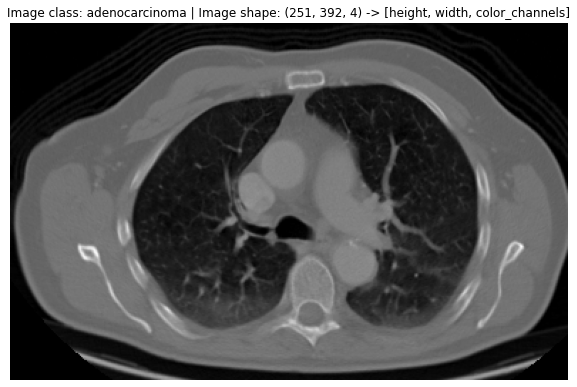

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [6]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 224x224
    transforms.Resize(size=(224, 224)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

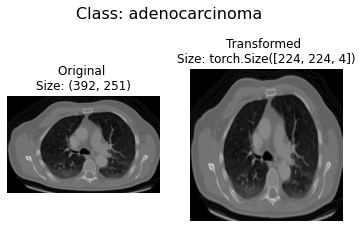

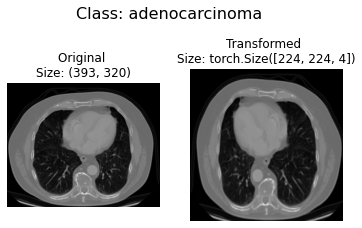

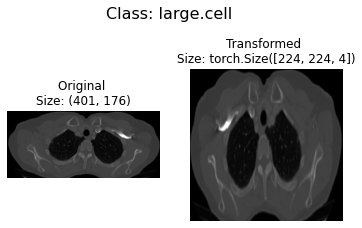

In [7]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [8]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_path, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_path, 
                                 transform=data_transform)

valid_data = datasets.ImageFolder(root=valid_path, 
                                 transform=data_transform)



In [9]:
print(f"Train data:\n{train_data}\nTest data:\n{test_data}\nValid data:\n{valid_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 613
    Root location: Data/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 315
    Root location: Data/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Valid data:
Dataset ImageFolder
    Number of datapoints: 72
    Root location: Data/valid
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [10]:
class_names = train_data.classes
class_names

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [11]:
train_data.class_to_idx

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [12]:
len(train_data), len(test_data), len(valid_data)

(613, 315, 72)

In [13]:
total = len(train_data) + len(test_data) + len(valid_data)
print(f"{(len(train_data)*100)/total}%, {(len(test_data)*100)/total}%, {(len(valid_data)*100)/total}%")

61.3%, 31.5%, 7.2%


In [14]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.00

In [15]:
l = []
for i in range(len(valid_data)):
    if train_data[i][0].shape[0] not in l:
        l.append(train_data[i][0].shape[0])

l

[3]

Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


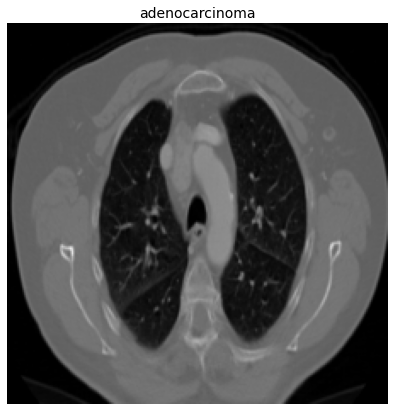

In [16]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [17]:
for i in os.scandir():
    print(i)

<DirEntry '.idea'>
<DirEntry '.ipynb_checkpoints'>
<DirEntry 'Backup'>
<DirEntry 'customDataset.py'>
<DirEntry 'Data'>
<DirEntry 'FilterData.ipynb'>
<DirEntry 'test_data.csv'>
<DirEntry 'train_data.csv'>
<DirEntry 'valid_data.csv'>


In [18]:
with Image.open("Data\\test\\adenocarcinoma\\ac_1.png") as f:
    a = data_transform(f)

In [19]:
os.cpu_count()

12

In [20]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=128, # how many samples per batch?
                              num_workers=os.cpu_count(), # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=128, 
                             num_workers=os.cpu_count(), 
                             shuffle=False) # don't usually need to shuffle testing data

valid_dataloader = DataLoader(dataset=valid_data, 
                             batch_size=128, 
                             num_workers=os.cpu_count(), 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader, valid_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1bd33960c10>,
 <torch.utils.data.dataloader.DataLoader at 0x1bd338e7a90>)

In [29]:
train_data.classes

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [30]:
train_data.class_to_idx

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [21]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [59]:
# 1. Construct a model class that subclasses nn.Module
class CancerDetect(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=224, out_features=512) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=512, out_features=1) # takes in 5 features, produces 1 feature (y)
        
        self.layer_3 = nn.Linear(in_features=224, out_features=512) # takes in 2 features (X), produces 5 features
        self.layer_4 = nn.Linear(in_features=512, out_features=1)
        
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x)).permute(2, 0, 1))).permute(0, 2, 1).squeeze() # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
# model_0 = CancerDetect().to(device)
model_0 = CancerDetect()
model_0, next(iter(model_0.parameters()))

(CancerDetect(
   (layer_1): Linear(in_features=224, out_features=512, bias=True)
   (layer_2): Linear(in_features=512, out_features=1, bias=True)
   (layer_3): Linear(in_features=224, out_features=512, bias=True)
   (layer_4): Linear(in_features=512, out_features=1, bias=True)
 ),
 Parameter containing:
 tensor([[ 0.0176, -0.0129, -0.0644,  ..., -0.0620,  0.0414,  0.0277],
         [ 0.0254,  0.0227, -0.0218,  ..., -0.0359, -0.0622, -0.0524],
         [-0.0367, -0.0076, -0.0227,  ...,  0.0110,  0.0228, -0.0607],
         ...,
         [ 0.0518, -0.0232,  0.0231,  ..., -0.0003, -0.0403, -0.0441],
         [ 0.0230, -0.0113, -0.0299,  ..., -0.0349,  0.0654, -0.0126],
         [-0.0390, -0.0461,  0.0098,  ..., -0.0035,  0.0046, -0.0455]],
        requires_grad=True))

In [52]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
# loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in
loss_fn = nn.L1Loss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

In [53]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [54]:
# train_dataloader = train_dataloader.to(device)
# test_dataloader = test_dataloader.to(device)
# valid_dataloader = valid_dataloader.to(device)

In [62]:
for i in train_dataloader:
    for j in range(128):
        y_pred = model_0(i[0][j])
    
        if i[1][j] == 0:
            y_train = torch.tensor([1, 0, 0])
        elif i[1][j] == 1:
            y_train = torch.tensor([0, 1, 0])
        elif i[1][j] == 2:
            y_train = torch.tensor([0, 0, 0])
        elif i[1][j] == 3:
            y_train = torch.tensor([0, 0, 1])
        
        loss = loss_fn(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(accuracy_fn(y_train, y_pred))

0.0
0.0
0.0
0.0


IndexError: index 101 is out of bounds for dimension 0 with size 101

In [28]:
model_0(train_data[0][0]), train_data[0][1]

(tensor([-0.0071, -0.0071, -0.0071], grad_fn=<SqueezeBackward0>), 0)

In [ ]:
if train_data[0][1] == 0:
    y_train = torch.tensor([1, 0, 0])
elif train_data[0][1] == 1:
    y_train = torch.tensor([0, 1, 0])
elif train_data[0][1] == 2:
    y_train = torch.tensor([0, 0, 0])
elif train_data[0][1] == 3:
    y_train = torch.tensor([0, 0, 1])